In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
metadata=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/greeks.csv")
metadata.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [3]:
data=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
data.shape

(617, 58)

In [5]:
# Count missing values in each column
missing_values = data[data['Class']==1].isnull().sum()

# Filter columns with non-zero missing values
non_zero_missing = missing_values[missing_values > 0]

print(non_zero_missing)

CC    1
EL    6
FC    1
FS    1
dtype: int64


In [6]:
# Count missing values in each column
missing_values = data[data['Class']==0].isnull().sum()

# Filter columns with non-zero missing values
non_zero_missing = missing_values[missing_values > 0]

print(non_zero_missing)

BQ    60
CB     2
CC     2
DU     1
EL    54
FL     1
FS     1
GL     1
dtype: int64


In [7]:
# Count missing values in each column
missing_values = data.isnull().sum()

# Filter columns with non-zero missing values
non_zero_missing = missing_values[missing_values > 0]

print(non_zero_missing)

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: >

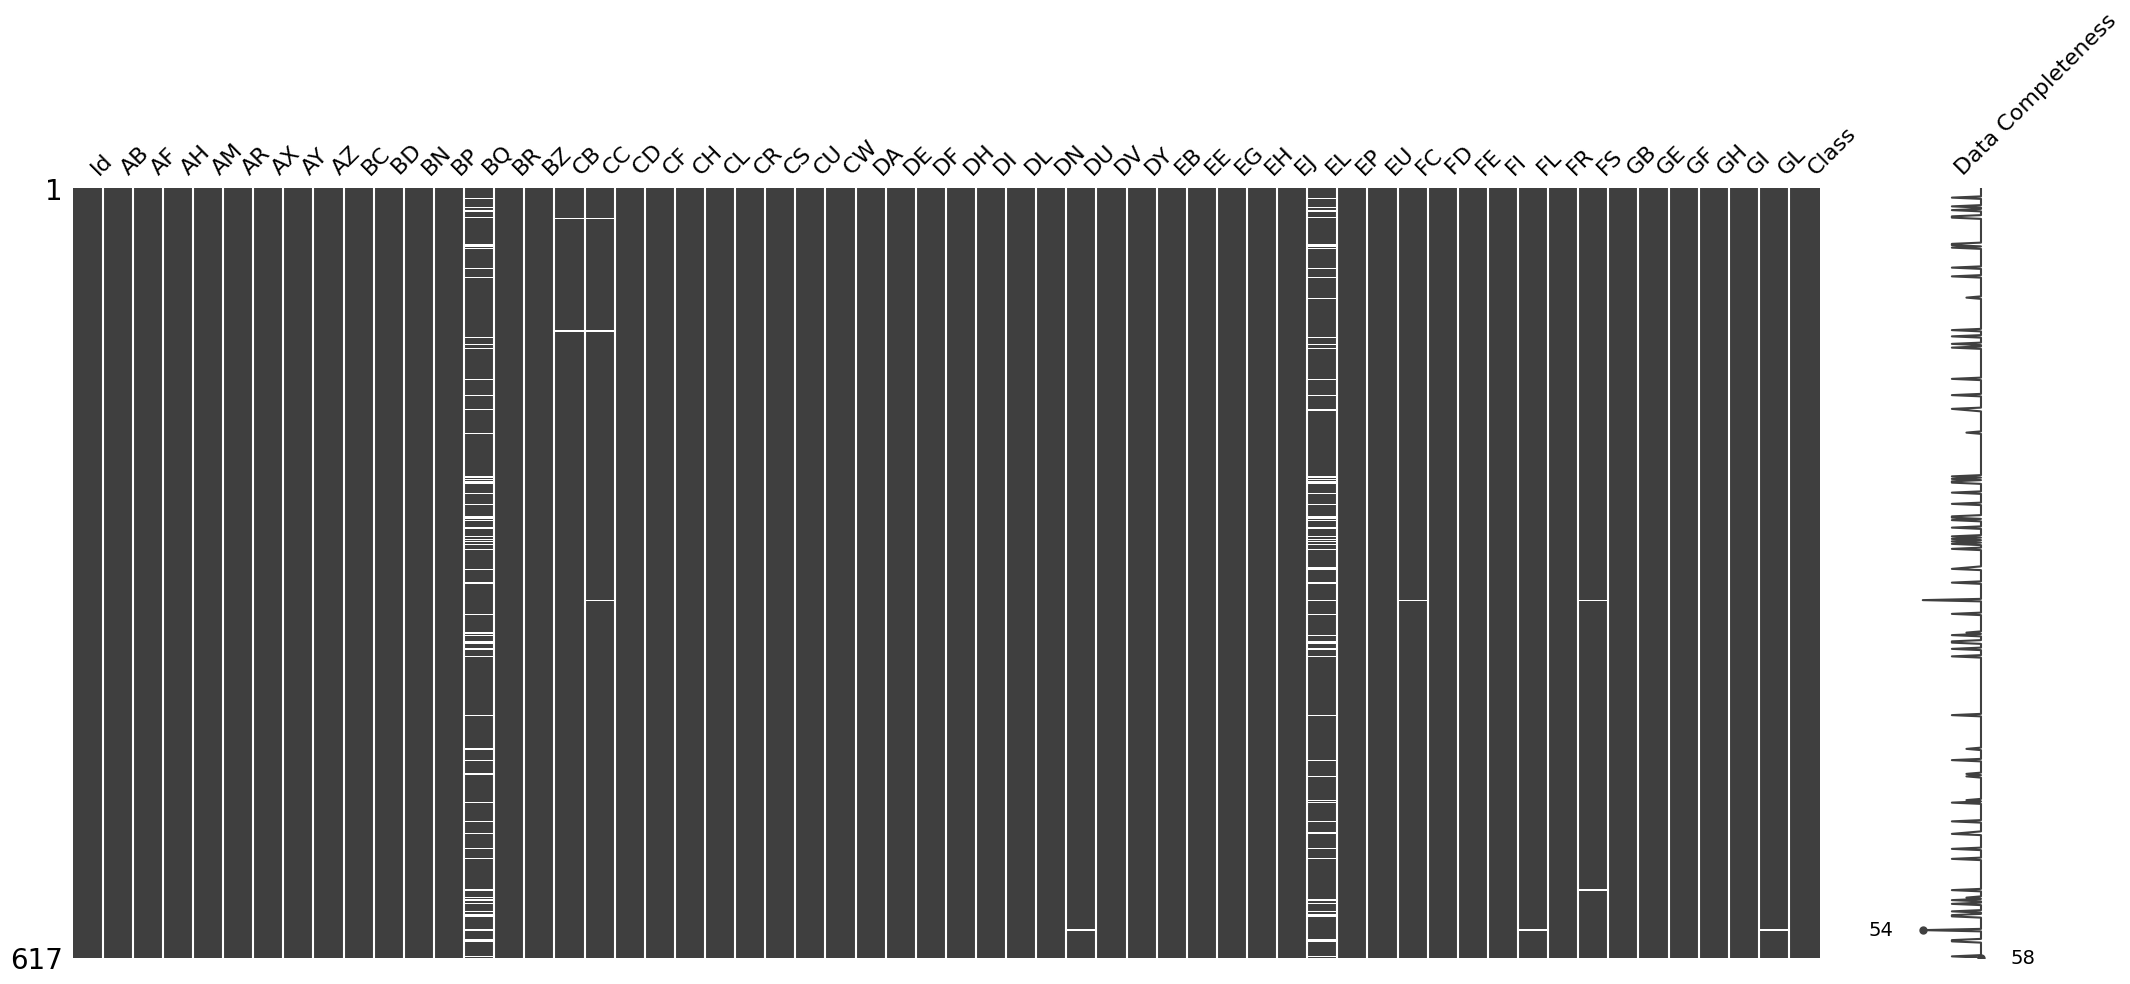

In [8]:
import plotly.express as px
import missingno as msno

msno.matrix(data,labels = True)

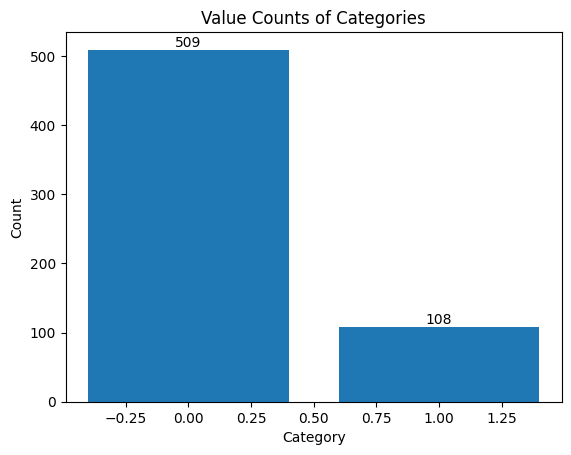

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the value counts of the 'Category' column
value_counts = data['Class'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Add value count labels
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')

# Display the plot
plt.show()

In [10]:
# Get the value counts of the 'Category' column
value_counts = data['Class'].value_counts().reset_index()

# Rename the columns for clarity
value_counts.columns = ['Class', 'Count']

# Create a bar graph using Plotly Express
fig = px.bar(value_counts, x='Class', y='Count', color='Count', color_continuous_scale='balance')

# Set labels and title
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    title='Value Counts of Categories'
)

# Display the plot
fig.show()

/tmp/ipykernel_20/1934571914.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



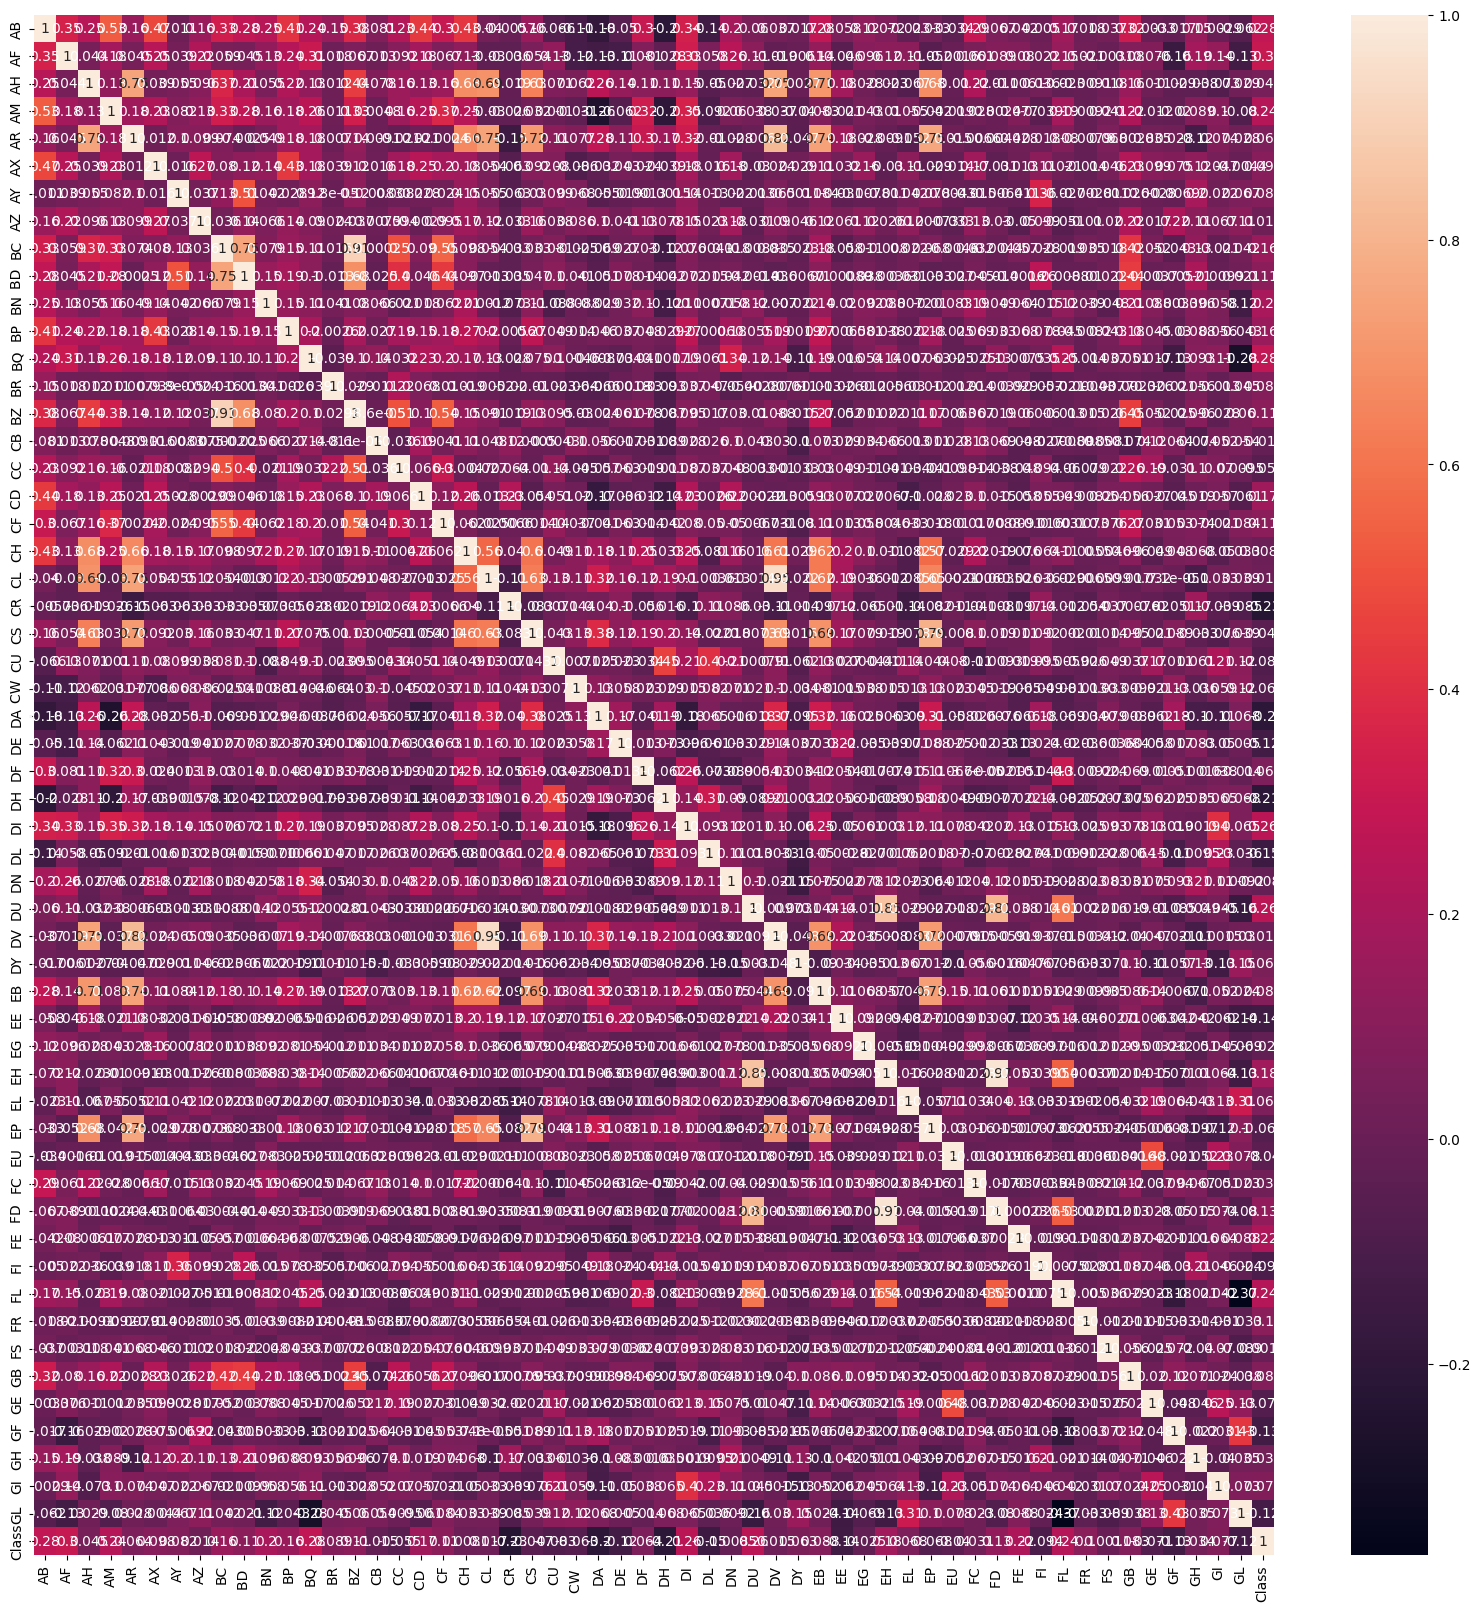

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(data.corr(), annot=True)